# daily_profile_visualisation

This notebook visualises the daily profile data of an IES weather .txt file. A daily profile analysis considers the time of day, for example mean temperatures vs. time of day.

Use ***Shift-Enter*** or ***Ctrl-Enter*** to run the code cells.

The notebook creates plots in the notebook itself and it also saves these plots in the folder 'daily_profile_visualisation_outputs'.

The notebook creates plots for one weather variable at a time. This variable can be changed in Step 4.

## Step 1: Choose the file to visualise

The weather data in IES VistaPro can be exported using the Save icon when viewing a table. To do this:

- Run an IES simulation
- Go to the VistaPro results module
- Select the weather data variables of interest
- View these variable in a table
- Click on the ***save*** icon to export this data as a .txt file.

The name/path for the IES weather .txt file can then be specified in the code cell below.

In [1]:
filename='MyWeather.txt'

## Step 2: Run the code below to import the file

In [2]:
import pandas as pd
df=pd.read_csv(filename,sep='\t',encoding = 'unicode_escape')
df=df.drop([0,1])
df['Unnamed: 0']=df['Unnamed: 0'].fillna(method='ffill')
df['Unnamed: 0']=df['Unnamed: 0'].str[5:] + r'/2003'
mask=(df['Unnamed: 1']=='24:00')
df['Unnamed: 1'][mask]='00:00'
df['Unnamed: 1']=df['Unnamed: 1'].str[:3]+'30'
df.insert(0,column='datetime',value=pd.to_datetime(df['Unnamed: 0']+' '+df['Unnamed: 1'],format='%d/%b/%Y %H:%M'))
df=df.drop(columns=['Unnamed: 0','Unnamed: 1'])
df=df.set_index('datetime')
df=df.astype('float64')
units={}
for column in df.columns: 
    var_name=column.split(' (')[0]
    unit=column.split(' (')[1].split(')')[0]
    df=df.rename(columns={column:var_name})
    units[var_name]=unit
print('UNITS: '+str(units))
df.head()

UNITS: {'External dew-point temp.': '°C', 'Global radiation': 'W/m²', 'Max. adaptive temp.': '°C', 'Daily running mean temp.': '°C', 'Direct radiation': 'W/m²', 'Wet-bulb temperature': '°C', 'Wind speed': 'm/s', 'Solar azimuth': 'deg.', 'Diffuse radiation': 'W/m²', 'Dry-bulb temperature': '°C'}


,External dew-point temp.,Global radiation,Max. adaptive temp.,Daily running mean temp.,Direct radiation,Wet-bulb temperature,Wind speed,Solar azimuth,Diffuse radiation,Dry-bulb temperature
datetime,,,,,,,,,,
2003-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01 01:30:00,2.08,0.0,23.02,3.69,0.0,3.6,5.0,25.7,0.0,4.8
2003-01-01 02:30:00,2.22,0.0,23.02,3.69,0.0,3.6,6.0,48.8,0.0,4.7
2003-01-01 03:30:00,1.77,0.0,23.02,3.69,0.0,3.2,5.0,66.5,0.0,4.3
2003-01-01 04:30:00,1.69,0.0,23.02,3.69,0.0,3.0,5.0,80.6,0.0,4.0


## Step 3: View the weather variables available

In [3]:
for x in list(df.columns): print(x)

External dew-point temp.
Global radiation
Max. adaptive temp.
Daily running mean temp.
Direct radiation
Wet-bulb temperature
Wind speed
Solar azimuth
Diffuse radiation
Dry-bulb temperature


## Step 4: Choose the weather variable to analysis

The weather variables are listed in Step 3. One variable is chosen for analysis in the code cell below.

In [4]:
var='Dry-bulb temperature'

## Step 5: Create and save a daily profile mean plot

Calculates the mean of the variable for each time of day, and plots this on a time-series plot.

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: daily_profile_visualisation_outputs/daily_profile_meanDry-bulb temperature.png


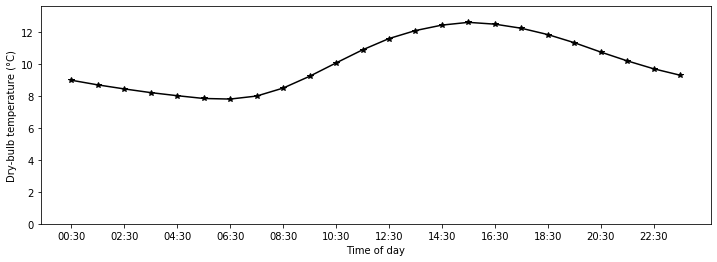

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df1=df[[var]].copy()
df1['date']=df1.index.date
df1['time']=df1.index.time
df1=df1.pivot(index='time',columns='date',values=var)
x=df1.mean(axis=1)
fig, ax = plt.subplots(1,figsize=(12,4))
ax.plot(x,color='black',marker='*')
ax.set_xlabel('Time of day')
ax.set_xticks(x.index[::2])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%m'))
ax.set_ylabel(var + ' (' + units[var] + ')')
ax.set_ylim([0 if min(x.values)>0 else min(x.values)-1,max(x.values)+1])
plot_filename=r'daily_profile_visualisation_outputs/daily_profile_mean'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 6: Create and save a daily profile mean max min plot

Calculates the mean,maximum and minimum of the variable for each time of day, and plots this on a time-series plot.

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: daily_profile_visualisation_outputs/daily_profile_mean_max_minDry-bulb temperature.png


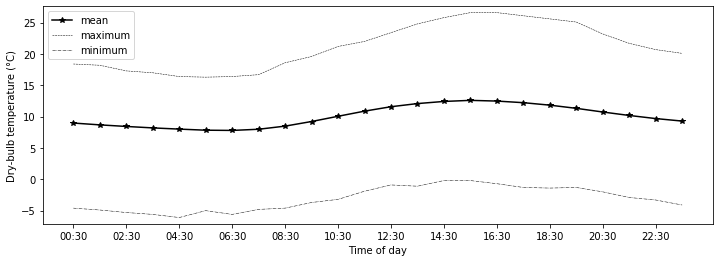

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df1=df[[var]].copy()
df1['date']=df1.index.date
df1['time']=df1.index.time
df1=df1.pivot(index='time',columns='date',values=var)
mean,maximum,minimum=df1.mean(axis=1),df1.max(axis=1),df1.min(axis=1)
fig, ax = plt.subplots(1,figsize=(12,4))
ax.plot(mean,color='black',marker='*',label='mean')
ax.plot(maximum,'--',color='black',linewidth=0.5,label='maximum')
ax.plot(minimum,'-.',color='black',linewidth=0.5,label='minimum')
ax.set_xlabel('Time of day')
ax.set_xticks(x.index[::2])
ax.set_ylabel(var + ' (' + units[var] + ')')
ax.set_ylim([0 if min(minimum.values)>0 else min(minimum.values)-1,max(maximum.values)+1])
ax.legend(loc='upper left')
plot_filename=r'daily_profile_visualisation_outputs/daily_profile_mean_max_min'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 7: Create and save a daily profile boxplot

Calculates a boxplot for each time of day, and plots this on a time-series plot.

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: daily_profile_visualisation_outputs/daily_profile_boxplotDry-bulb temperature.png


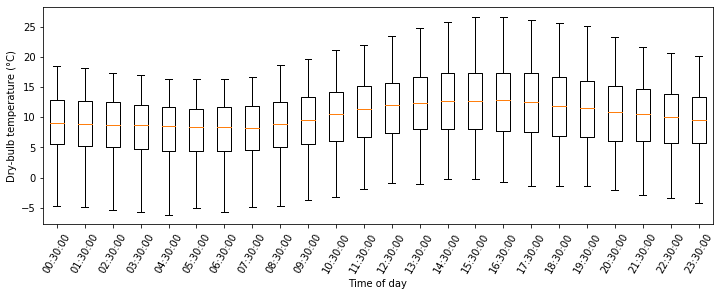

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df1=df[[var]].copy()
df1['date']=df1.index.date
df1['time']=df1.index.time
df1=df1.pivot(index='time',columns='date',values=var)
df1[df1.columns[0]]=df1[df1.columns[0]].fillna(df1[df1.columns[0]].mean()) # replaces missing data in column 1 with column 1 mean value
fig, ax = plt.subplots(1,figsize=(12,4))
ax.boxplot(df1)
ax.set_xlabel('Time of day')
ax.set_xticklabels(df1.index,rotation='60')
ax.set_ylabel(var + ' (' + units[var] + ')')
plot_filename=r'daily_profile_visualisation_outputs/daily_profile_boxplot'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 7: Create and save a daily profile mean per month plot

Calculates a boxplot for each time of day on an monthly basis, and plots this on a time-series plot.

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: daily_profile_visualisation_outputs/daily_profile_mean_per_monthDry-bulb temperature.png


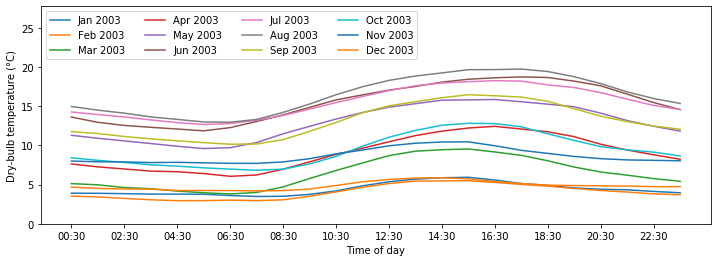

In [8]:
df1=df[[var]].copy()
df1['date']=df1.index.date
df1['time']=df1.index.time
df1=df1.pivot(index='time',columns='date',values=var)
df2=pd.DataFrame(index=df1.index)
for i in range(1,13):
    cols=[x for x in df1.columns if x.month==i]
    df2[pd.Timestamp(cols[0]).to_period('M')]=df1[cols].mean(axis=1)
fig, ax = plt.subplots(1,figsize=(12,4))
for col in df2.columns:
    ax.plot(df2[col],label=col.strftime("%b %Y"))
ax.set_xlabel('Time of day')
ax.set_xticks(x.index[::2])
ax.set_ylabel(var + ' (' + units[var] + ')')
ax.set_ylim([0 if df2.values.min()>0 else df2.values.min()-1,df2.values.max()+8])
ax.legend(loc='upper left',ncol=4)
plot_filename=r'daily_profile_visualisation_outputs/daily_profile_mean_per_month'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()